# Lab Tutorial 03 (Solved)

- **Module:** Computer Vision - IN3060/INM460
- **Module leader:** [Giacomo Tarroni](mailto:giacomo.tarroni@city.ac.uk)

# Google Colab Setup
Before starting the tutorial, we need to run a few commands to set up our environment on Google Colab. To this end, make sure to have first gone through the **"Software setup guide"** document uploaded on Moodle. Also, if you are running this notebook on a local machine you can skip this section.

Run the following cell to mount your Google Drive. Follow the link, sign in to your Google account (the same account you used to store the lab materials for this tutorial!), and follow the instructions.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Now recall the path in your Google Drive where you uploaded the lab materials, fill it in below and run the cell:

In [ ]:
import os

# TODO: Fill in the Google Drive path where you uploaded the lab materials
# Example: GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'Colab Notebooks/Lab materials 01-20210104'

GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'Colab Notebooks/Computer Vision lab tutorials/Lab 03' 
GOOGLE_DRIVE_PATH = os.path.join('drive', 'My Drive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
print(os.listdir(GOOGLE_DRIVE_PATH))

If everything is working correctly then running the folowing cell should print the filenames from the lab materials folder:

```
['LondonEye.jpg', 'Westminster.jpg', 'Class.jpg', 'Lab_03.ipynb', 'Lab_03_Solved.ipynb']
```

# Introduction

In this lab tutorial, we will learn how to apply linear filtering to images. We will first implement **filters to blur and sharpen images**. Then we will learn how to **detect edges**.

# How to properly run the tutorial

To make the best out of the tutorial, you don't have to simply execute the cells and check the output. Instead, you have to **make an effort to understand each single line of code**. Browse the Internet looking for the official documentation for each command that you don't know, and modify the code to see if you properly understood its functionality.

In addition to this, while going through the notebook you will encounter code blocks that look like this:

```python
##############################################################################
# TODO: Write the equation for a line
##############################################################################
pass
##############################################################################
#                             END OF YOUR CODE                               #
##############################################################################
```

These blocks constitute **tasks**, i.e. cells that require you to write some code to obtain a certain functionality. You should replace the `pass` statement with your own code and leave the blocks intact, like this:

```python
##############################################################################
# TODO: Instructions for what you need to do
##############################################################################
y = m * x + b
##############################################################################
#                             END OF YOUR CODE                               #
##############################################################################
```

Don't worry if you don't get them straight away: this is why we're here anyway! Also, a separate version of this notebook with solved tasks will be released for your convenience on Moodle in the next few days.

# 1: Smoothing

Low-pass filtering (aka smoothing or blurring) is employed to remove high spatial frequency noise from a digital image. The low-pass filters usually employ moving window operator that affects one pixel of the image at a time, changing its value by some function of a local region (window) of pixels. The operator moves over the image to affect all the pixels in the image.

Let's start with a **moving average** (or box filter). We will first implement it using the convolve function, for which the actual kernel needs to be implemented:  

In [3]:
from skimage import io, color, img_as_float, img_as_ubyte
from scipy.ndimage import convolve 
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

k_size = 5
kernel = np.ones((k_size, k_size), dtype=float)/(k_size**2)
print("Kernel = ", "\n", kernel)

Kernel =  
 [[0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]]


Notice how we had to make sure the kernel was properly normalised by the number of kernel elements.

Let's now see what is the output after convolving an image with the above kernel:

Img data type = float64 , with max channel value = 1.0


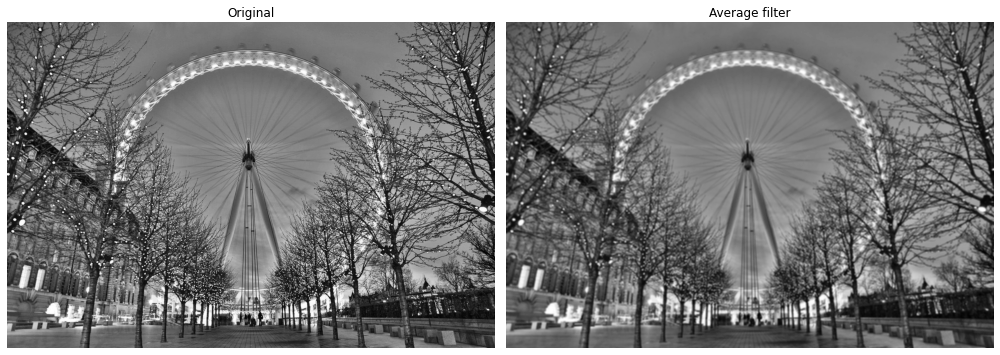

In [4]:
img = io.imread(os.path.join(GOOGLE_DRIVE_PATH, 'LondonEye.jpg'))
img = color.rgb2gray(img)         
print('Img data type =', img.dtype, ', with max channel value =', np.max(img))

img_filtered = convolve(img, kernel, mode='nearest')

fig, ax = plt.subplots(1, 2, figsize=(14, 18))
ax[0].imshow(img, cmap='gray')
ax[0].set_title('Original'), ax[0].set_axis_off()
ax[1].imshow(img_filtered, cmap='gray')
ax[1].set_title('Average filter'), ax[1].set_axis_off()
fig.tight_layout()
plt.show()

If you look carefully, you will see that the image to the right is smoothed, with many details blurred in the process. 

Try to run again the filtering above using different kernel sizes.

As we have seen in the lecture, a moving average can be implemented also using a `skimage` function called `filters.rank.mean`. This function requires a *structuring element*, which describes the neighbourhood in which the averaging operation will happen. There are many different structuring elements (both in 2D and 3D): for a visual representation, have a look [here](https://scikit-image.org/docs/dev/auto_examples/numpy_operations/plot_structuring_elements.html#sphx-glr-auto-examples-numpy-operations-plot-structuring-elements-py).

Let's start with a square:

In [5]:
from skimage.morphology import square, disk
from skimage import filters

se_square = square(5)
print("Square (5) = ", "\n", se_square)

Square (5) =  
 [[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]


Let's now apply the function (remembering that it accepts only uint types) and compare it with our previous result:

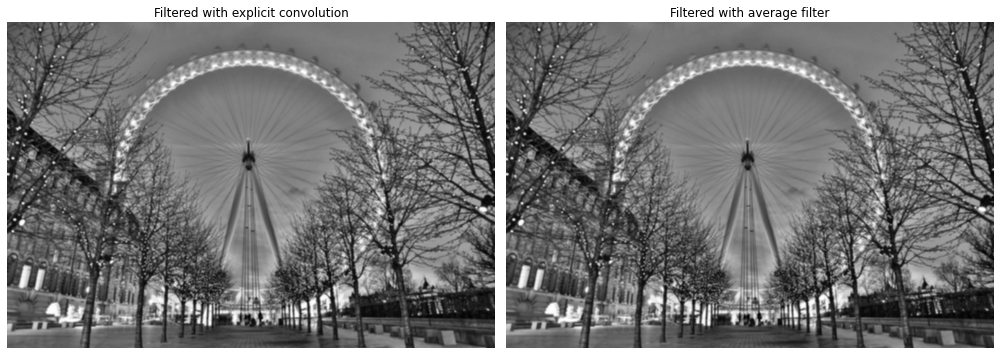

In [6]:
img_filtered2 = img_as_float(filters.rank.mean(img_as_ubyte(img), selem=se_square))    # rank.mean does not accept float

fig, ax = plt.subplots(1, 2, figsize=(14, 18))
ax[0].imshow(img_filtered, cmap='gray')
ax[0].set_title('Filtered with explicit convolution'), ax[0].set_axis_off()
ax[1].imshow(img_filtered2, cmap='gray')
ax[1].set_title('Filtered with average filter'), ax[1].set_axis_off()
fig.tight_layout()
plt.show()

# Same result (minus very small differences at the boundaries and due to dtype approximations)

As you can see, the two outputs are essentially the same (to be precise, there are very small differences at the boundaries due to the different way with which these two algorithms deal with them, but these are largely neglible).

Let's try now a different structuring element:

In [7]:
se_disk_3 = disk(3)
se_disk_5 = disk(5)
print("Disk (3) = ", "\n", se_disk_3)
print("Disk (5) = ", "\n", se_disk_5)

Disk (3) =  
 [[0 0 0 1 0 0 0]
 [0 1 1 1 1 1 0]
 [0 1 1 1 1 1 0]
 [1 1 1 1 1 1 1]
 [0 1 1 1 1 1 0]
 [0 1 1 1 1 1 0]
 [0 0 0 1 0 0 0]]
Disk (5) =  
 [[0 0 0 0 0 1 0 0 0 0 0]
 [0 0 1 1 1 1 1 1 1 0 0]
 [0 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1 0]
 [1 1 1 1 1 1 1 1 1 1 1]
 [0 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1 0]
 [0 0 1 1 1 1 1 1 1 0 0]
 [0 0 0 0 0 1 0 0 0 0 0]]


We can use them to perform the averaging, and compare the results:

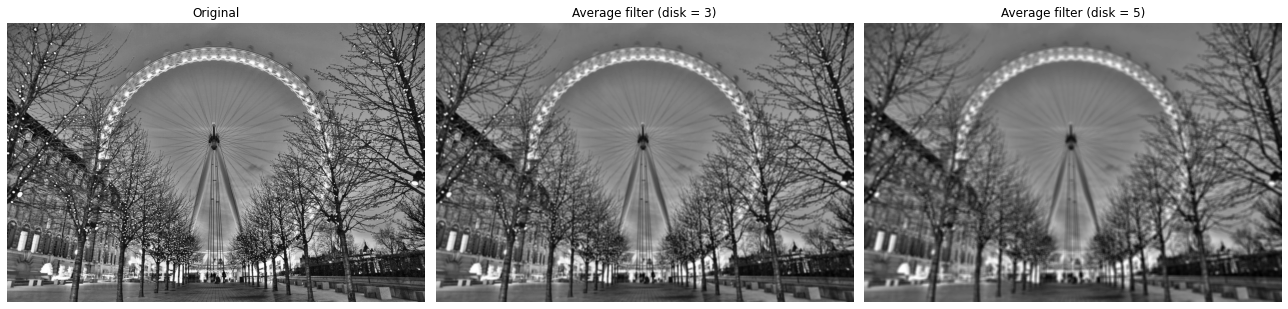

In [8]:
img_filt_disk_3 = img_as_float(filters.rank.mean(img_as_ubyte(img), selem=se_disk_3))
img_filt_disk_5 = img_as_float(filters.rank.mean(img_as_ubyte(img), selem=se_disk_5))

fig, ax = plt.subplots(1, 3, figsize=(18, 27))
ax[0].imshow(img, cmap='gray')
ax[0].set_title('Original'), ax[0].set_axis_off()
ax[1].imshow(img_filt_disk_3, cmap='gray')
ax[1].set_title('Average filter (disk = 3)'), ax[1].set_axis_off()
ax[2].imshow(img_filt_disk_5, cmap='gray')
ax[2].set_title('Average filter (disk = 5)'), ax[2].set_axis_off()
fig.tight_layout()
plt.show()

As mentioned earlier, low pass filters can be used for **denoising**. Let's test this. First, to make the input a little bit dirty, we spray some *salt & pepper noise* on the image and check on the result:

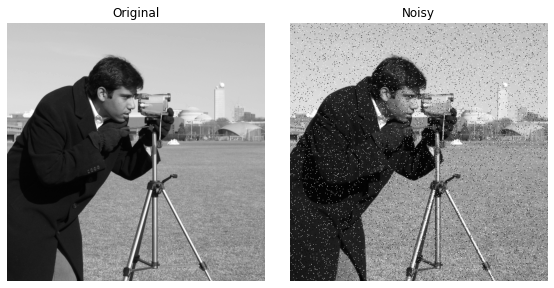

In [9]:
from skimage import util, data

img = img_as_float(data.camera())

# Add salt & pepper noise
img_noisy = util.random_noise(img, mode='s&p')

fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].imshow(img, cmap='gray')
ax[0].set_title('Original'), ax[0].set_axis_off()
ax[1].imshow(img_noisy, cmap='gray')
ax[1].set_title('Noisy'), ax[1].set_axis_off()
fig.tight_layout()
plt.show()

The salt & pepper type of noise is clearly visible. 

Let's try to filter it using an average filter. We will also try a **Gaussian filter**, using the dedicated function:

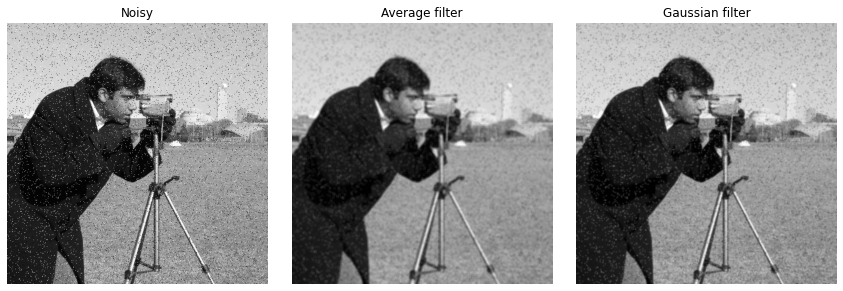

In [10]:
img_noisy_avg_filt = img_as_float(filters.rank.mean(img_as_ubyte(img_noisy), selem=se_square))
img_noisy_gauss_filt = filters.gaussian(img_noisy, sigma=1)

fig, ax = plt.subplots(1, 3, figsize=(12, 4))
ax[0].imshow(img_noisy, cmap='gray')
ax[0].set_title('Noisy'), ax[0].set_axis_off()
ax[1].imshow(img_noisy_avg_filt, cmap='gray')
ax[1].set_title('Average filter'), ax[1].set_axis_off()
ax[2].imshow(img_noisy_gauss_filt, cmap='gray')
ax[2].set_title('Gaussian filter'), ax[2].set_axis_off()
fig.tight_layout()
plt.show()

Well, this was underwhelming. None of the two filters did actually remove the noise: they just blurred it.

Any ideas?

## Task 1.1: Filtering out salt & pepper noise

Find a way to properly remove the noise from the previous image. First try to play around with the two filters above. Are you able to fix the image?

Now try to implement a [**median filter**](https://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.median). Write the code to display the images side by side, so to better evaluate the improvement.

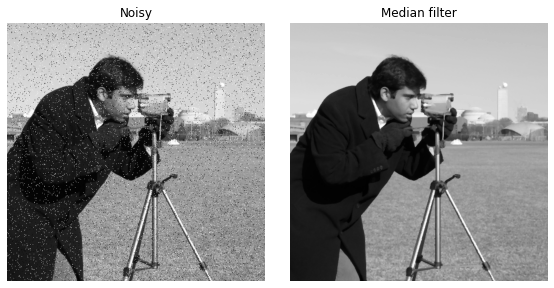

In [11]:
##############################################################################
# TODO: Filter salt & pepper noise and show results
##############################################################################
img_noisy_median_filt = filters.median(img_noisy, selem=square(3))

fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].imshow(img_noisy, cmap='gray')
ax[0].set_title('Noisy'), ax[0].set_axis_off()
ax[1].imshow(img_noisy_median_filt, cmap='gray')
ax[1].set_title('Median filter'), ax[1].set_axis_off()
fig.tight_layout()
plt.show()
##############################################################################
#                             END OF YOUR CODE                               #
##############################################################################

## Task 1.2: Filtering colour images

We have so far only filtered grayscale images. Try now to deal with colour images by yourself! Remember: the most basic approach consists in filtering each channel by itself.

Specifically, **add noise to the *LondonEye.jpg* image, apply a median filter and show the results**.

*Optional*: you can also try a fancier implementation using `skimage`'s [*adapt_rgb* decorator](https://scikit-image.org/docs/dev/auto_examples/color_exposure/plot_adapt_rgb.html), which was designed exactly for this task.

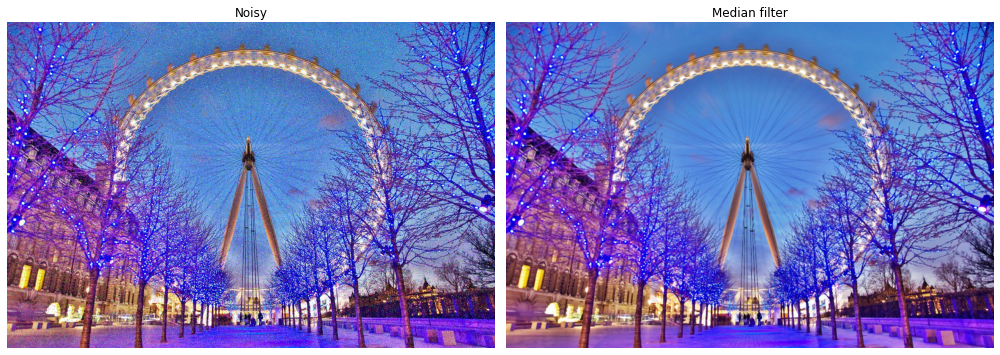

In [12]:
img = io.imread(os.path.join(GOOGLE_DRIVE_PATH, 'LondonEye.jpg'))

##############################################################################
# TODO: Add noise to the RGB image, then implement median filter
##############################################################################
img_noisy = util.random_noise(img, mode='s&p')

r_ch = img_noisy[:, :, 0]
g_ch = img_noisy[:, :, 1]
b_ch = img_noisy[:, :, 2]

r_ch_median = filters.median(r_ch, selem=square(3))
g_ch_median = filters.median(g_ch, selem=square(3))
b_ch_median = filters.median(b_ch, selem=square(3))

img_median_filt = np.dstack((r_ch_median, g_ch_median, b_ch_median))

fig, ax = plt.subplots(1, 2, figsize=(14, 8))
ax[0].imshow(img_noisy)
ax[0].set_title('Noisy'), ax[0].set_axis_off()
ax[1].imshow(img_median_filt)
ax[1].set_title('Median filter'), ax[1].set_axis_off()
fig.tight_layout()
plt.show()
##############################################################################
#                             END OF YOUR CODE                               #
##############################################################################

## Task 1.3 (Optional): Filtering specific areas of an image

In this lab's materials on Moodle you will find a crop of a picture of previous students of this module called *Class.jpg*. The task is to **blur only their faces**. In the next lectures, we'll learn how to automatically detect faces in pictures, but for now simply use the coordinates highlighted in this image (in the $(x, y)$ format) to achieve the goal:


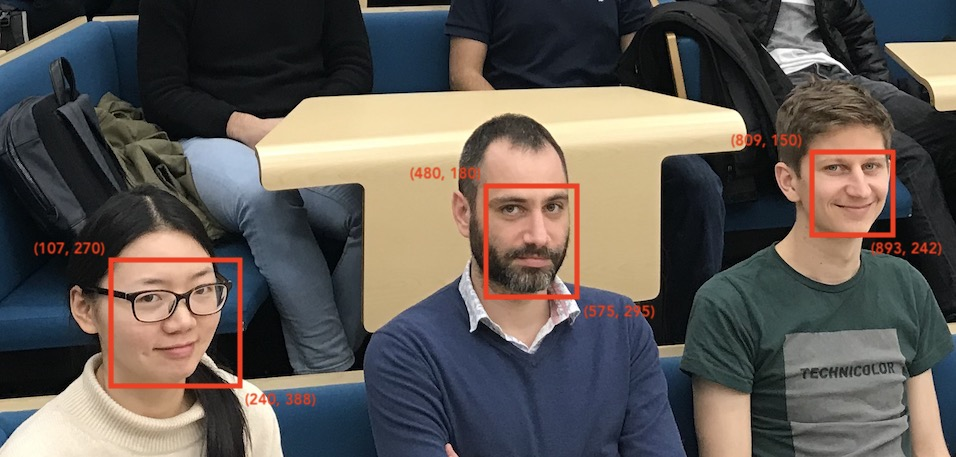

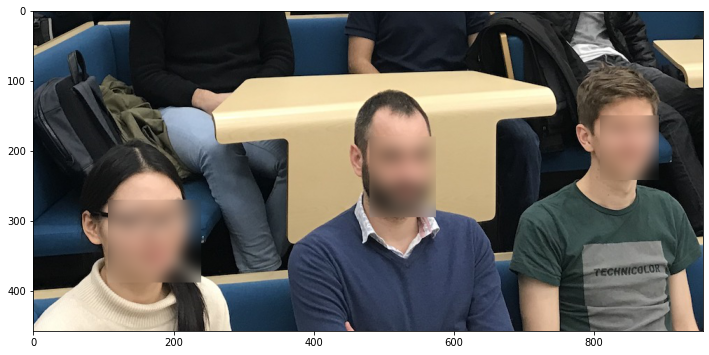

In [29]:
img = io.imread(os.path.join(GOOGLE_DRIVE_PATH, 'Class.jpg'))

##############################################################################
# TODO: Blur the faces in the image and show results
##############################################################################
img_blurred = img_as_ubyte(filters.gaussian(img, sigma=10, multichannel=True))
face_coords = np.array([[270, 388, 107, 240], 
                        [180, 295, 480, 575], 
                        [150, 242, 809, 893]])
img_composite = img.copy()

for i in range(face_coords.shape[0]):
    img_composite[face_coords[i, 0]:face_coords[i, 1], face_coords[i, 2]:face_coords[i, 3], :] = \
        img_blurred[face_coords[i, 0]:face_coords[i, 1], face_coords[i, 2]:face_coords[i, 3], :]

plt.figure(figsize=(12, 9))
plt.imshow(img_composite)
plt.show()
##############################################################################
#                             END OF YOUR CODE                               #
##############################################################################

# 2: Sharpening

A high-pass filter can be used to make an image appear sharper. These filters emphasize fine details in the image - the opposite of the low-pass filter. High-pass filtering works in the same way as low-pass filtering; it just uses a different convolution kernel.

As we have seen in the lecture, **sharpening** can be performed by adding to the original image *sharp details*, which can be computed as the difference between the original image and its blurred version. These details are then scaled, and added back to the original image:

`enhanced image = original + amount * (original - blurred)`

This technique is also referred to as *unsharp masking*. The blurring step could use any image filter method, e.g. average filter, but traditionally a gaussian filter is used. `skimage` has a dedicated function called `filters.unsharp_mask`. The `radius` parameter in the unsharp masking filter refers to the `sigma` parameter of the gaussian filter.

(Adapted from [here](https://scikit-image.org/docs/dev/auto_examples/filters/plot_unsharp_mask.html)).

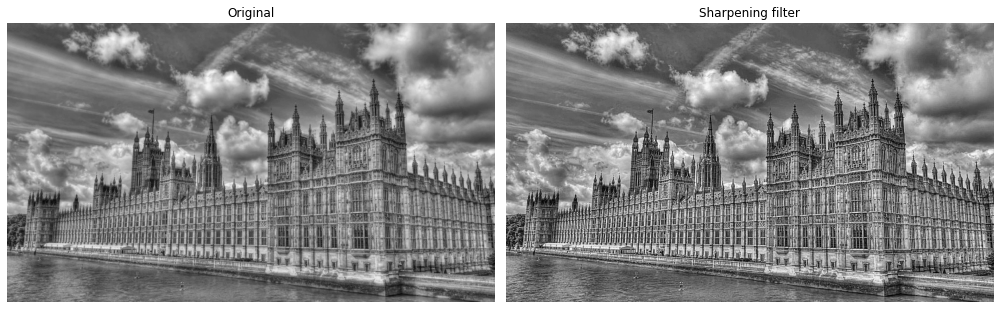

In [14]:
from skimage import io, color, filters
import matplotlib.pyplot as plt

img = io.imread(os.path.join(GOOGLE_DRIVE_PATH, 'Westminster.jpg'))
img = color.rgb2gray(img)         

img_sharpened = filters.unsharp_mask(img, radius=1, amount=2)

fig, ax = plt.subplots(1, 2, figsize=(14, 8))
ax[0].imshow(img, cmap='gray')
ax[0].set_title('Original'), ax[0].set_axis_off()
ax[1].imshow(img_sharpened, cmap='gray')
ax[1].set_title('Sharpening filter'), ax[1].set_axis_off()
fig.tight_layout()
plt.show()

Notice how the detailes are clearer and sharper.

# 3: Edge detection

**Edge detection** is a fundamental step of many computer vision pipelines. There are several methods for edge detection in images: in this section we will perform detection of vertical and horizontal edges in an image using **first order derivatives**, and also use Sobel kernels. We will finally compute the image Laplacian (which uses second order derivatives).

Let's start by creating the first derivative kernel along the $x$ direction exactly as we did in the lecture:

In [30]:
from skimage import io, color, filters
from scipy.ndimage import convolve
import matplotlib.pyplot as plt
import numpy as np

img = io.imread(os.path.join(GOOGLE_DRIVE_PATH, 'Westminster.jpg'))
img = color.rgb2gray(img)

kernel_x = 0.5*np.array([-1, 0, 1]).reshape((1, 3))
print("Kernel = ", "\n", kernel_x)

Kernel =  
 [[-0.5  0.   0.5]]


Then let's use it to compute the image derivative along $x$ through convolution:

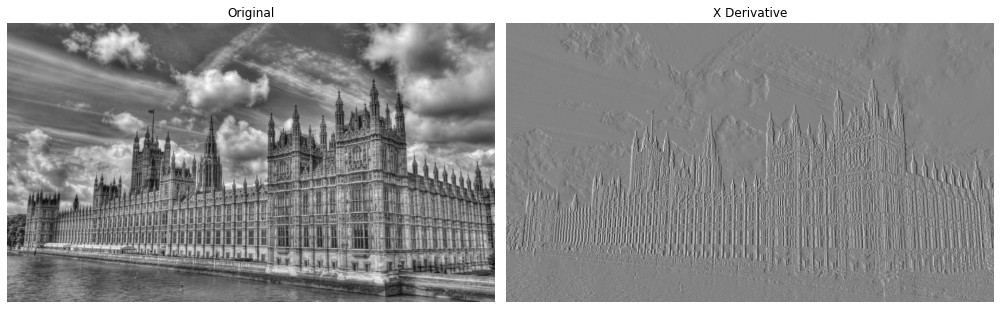

In [16]:
img_x = convolve(img, kernel_x)

fig, ax = plt.subplots(1, 2, figsize=(14, 8))
ax[0].imshow(img, cmap='gray')
ax[0].set_title('Original'), ax[0].set_axis_off()
ax[1].imshow(img_x, cmap='gray')
ax[1].set_title('X Derivative'), ax[1].set_axis_off()
fig.tight_layout()
plt.show()

We can perform the same operation along the $y$ axis. Note that we don't need to define the kernel from scratch, but we can instead simply transpose the previous kernel:

In [31]:
kernel_y = kernel_x.T
print("Kernel = ", "\n", kernel_y)

Kernel =  
 [[-0.5]
 [ 0. ]
 [ 0.5]]


Let's now compute the image derivative along $y$:

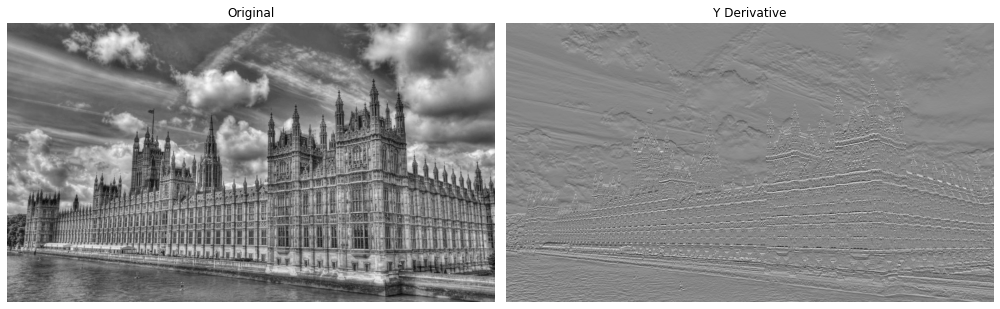

In [18]:
img_y = convolve(img, kernel_y)

fig, ax = plt.subplots(1, 2, figsize=(14, 8))
ax[0].imshow(img, cmap='gray')
ax[0].set_title('Original'), ax[0].set_axis_off()
ax[1].imshow(img_y, cmap='gray')
ax[1].set_title('Y Derivative'), ax[1].set_axis_off()
fig.tight_layout()
plt.show()

Notice the difference between the two image derivatives.

In a similar fashion, we could implement other types of first derivative kernels. However, `skimage` has a series of filtering functions already implemented for the most common variants (e.g. Sobel, Prewitt):

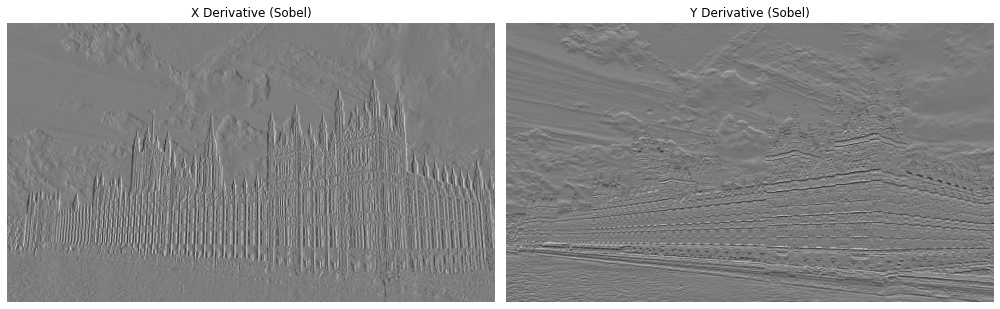

In [19]:
img_sobel_x = filters.sobel_v(img)
img_sobel_y = filters.sobel_h(img)

fig, ax = plt.subplots(1, 2, figsize=(14, 8))
ax[0].imshow(img_sobel_x, cmap='gray')
ax[0].set_title('X Derivative (Sobel)'), ax[0].set_axis_off()
ax[1].imshow(img_sobel_y, cmap='gray')
ax[1].set_title('Y Derivative (Sobel)'), ax[1].set_axis_off()
fig.tight_layout()
plt.show()

## Task 3.1: Comparing derivative kernels


How do the different kernel designs compare?

**Compute the gradient magnitude** of the image using the standard image derivatives, and **compare the result to the gradient magnitude computed using the Sobel** derivatives. For the latter, note that there's no need for you to use the two component separately: you can use the [`sobel`](https://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.sobel) function in `skimage`.

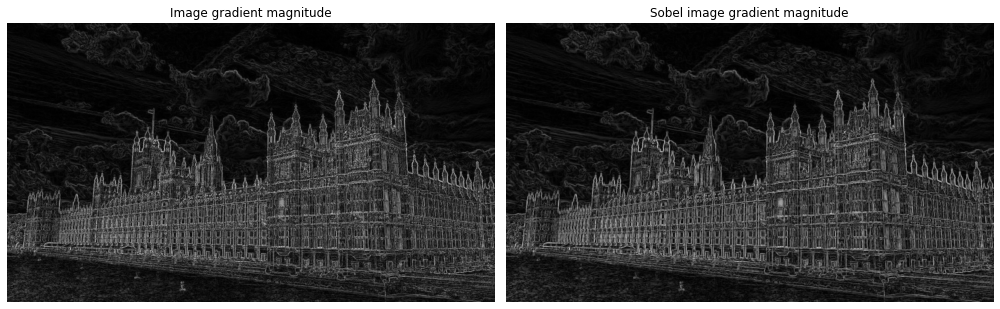

In [20]:
##############################################################################
# TODO: Compute gradient magnitude and compare to Sobel one
##############################################################################
img_gradient_mag = np.sqrt(img_x**2 + img_y**2)
img_sobel_gradient_mag = filters.sobel(img)

fig, ax = plt.subplots(1, 2, figsize=(14, 8))
ax[0].imshow(img_gradient_mag, cmap='gray')
ax[0].set_title('Image gradient magnitude'), ax[0].set_axis_off()
ax[1].imshow(img_sobel_gradient_mag, cmap='gray')
ax[1].set_title('Sobel image gradient magnitude'), ax[1].set_axis_off()
fig.tight_layout()
plt.show()
##############################################################################
#                             END OF YOUR CODE                               #
##############################################################################

Now let's move to **second order derivatives** and extract the image Laplacian. We can use the dedicated function:

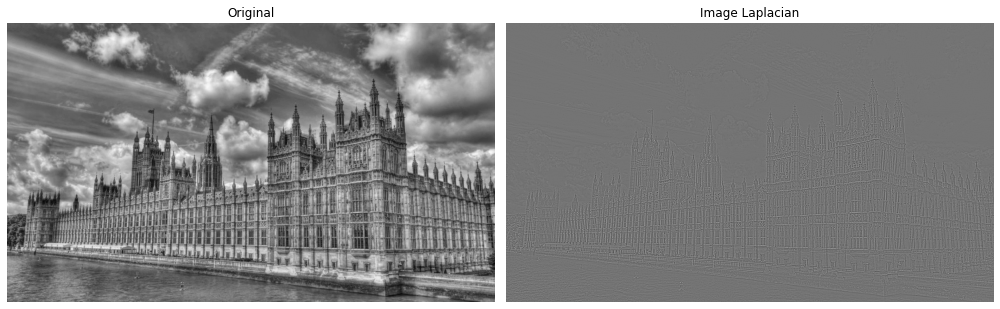

In [21]:
img_laplacian = filters.laplace(img)

fig, ax = plt.subplots(1, 2, figsize=(14, 8))
ax[0].imshow(img, cmap='gray')
ax[0].set_title('Original'), ax[0].set_axis_off()
ax[1].imshow(img_laplacian, cmap='gray')
ax[1].set_title('Image Laplacian'), ax[1].set_axis_off()
fig.tight_layout()
plt.show()